In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === CONFIGURATION ===
FREQ = "daily"              # "daily" ou "hourly"
MODE = "scenario"           # "classic" ou "scenario"
METHOD = "lasso"            # "lasso" ou "ridge"

BASE_DIR = Path.cwd().parents[1]  
RAW_DIR = BASE_DIR / "data" / "modified_data"
PREDS_PATH = BASE_DIR / "models" / "reg_lin" / f"preds_{METHOD}_{FREQ}_{MODE}.csv"
TEST_PATH = RAW_DIR / f"test_{FREQ}.csv"

# === LOAD ===
df_preds = pd.read_csv(PREDS_PATH)
df_test = pd.read_csv(TEST_PATH)
df_test["date"] = pd.to_datetime(df_test["date"])

# === RENOMMER colonnes de vérité
df_test.rename(columns={
    "conso_elec_mw": "conso_elec_mw_true",
    "conso_gaz_mw": "conso_gaz_mw_true"
}, inplace=True)

# === AJOUTER les colonnes pour merge
df_preds["date"] = df_test["date"]
df_preds["insee_region"] = df_test["insee_region"]

# === RENOMMER les prédictions
df_preds.rename(columns={
    "conso_elec_mw": "conso_elec_mw_pred",
    "conso_gaz_mw": "conso_gaz_mw_pred"
}, inplace=True)

# === MERGE
df_merged = pd.merge(df_test, df_preds, on=["date", "insee_region"])

# === APERÇU
df_merged.head()


date  insee_region  conso_elec_mw_true  conso_gaz_mw_true  \
0 2022-01-23            32            306155.0           303728.0   
1 2022-01-23            27            140415.0           103124.0   
2 2022-01-23            24            138688.0            77697.0   
3 2022-01-23            11            480374.0           406747.0   
4 2022-01-23            52            189539.0           115611.0   

   temperature_2m_max  temperature_2m_min  precipitation_sum  weather_code  \
0                 6.3                 0.3                0.0             3   
1                 4.5                 3.5                0.0             3   
2                 5.4                 3.0                0.0             3   
3                 5.2                 3.2                0.2            51   
4                 5.3                 3.6                0.0             3   

   apparent_temperature_max  apparent_temperature_min  ...            sunset  \
0                       2.7                      -3.7  ...  2022-01-23T18:27   
1                       2.6                       0.0  ...  2022-01-23T18:36   
2                       3.2                      -0.6  ...  2022-01-23T18:42   
3                       1.9                       0.2  ...  2022-01-23T18:33   
4                       2.3                       0.7  ...  2022-01-23T18:24   

   sunshine_duration  daylight_duration wind_speed_10m_max wind_gusts_10m_max  \
0           24790.71           33083.82               19.4               38.2   
1               0.00           32239.65               15.8               31.3   
2            3385.55           32356.90               14.2               27.4   
3               0.00           32501.36               11.3               22.7   
4               0.00           31723.52                9.7               19.1   

   wind_direction_10m_dominant  shortwave_radiation_sum  \
0                           35                     5.89   
1                          105                     2.69   
2                          108                     3.32   
3                           74                     2.48   
4                          148                     1.75   

   et0_fao_evapotranspiration  conso_elec_mw_pred  conso_gaz_mw_pred  
0                        0.61       338213.404449      263594.388231  
1                        0.42       179261.672702      136424.930140  
2                        0.48       171343.116172      125830.946650  
3                        0.40       453896.276442      271196.334460  
4                        0.34       179333.446159      119653.865121  

[5 rows x 24 columns]

In [2]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_merged, x="date", y="conso_elec_mw_true", label="Élec réelle", linewidth=2)
sns.lineplot(data=df_merged, x="date", y="conso_elec_mw_pred", label="Élec prédite", linestyle="--")
plt.title("⚡ Évolution de la consommation électrique - Réel vs Prédit")
plt.xlabel("Date")
plt.ylabel("MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

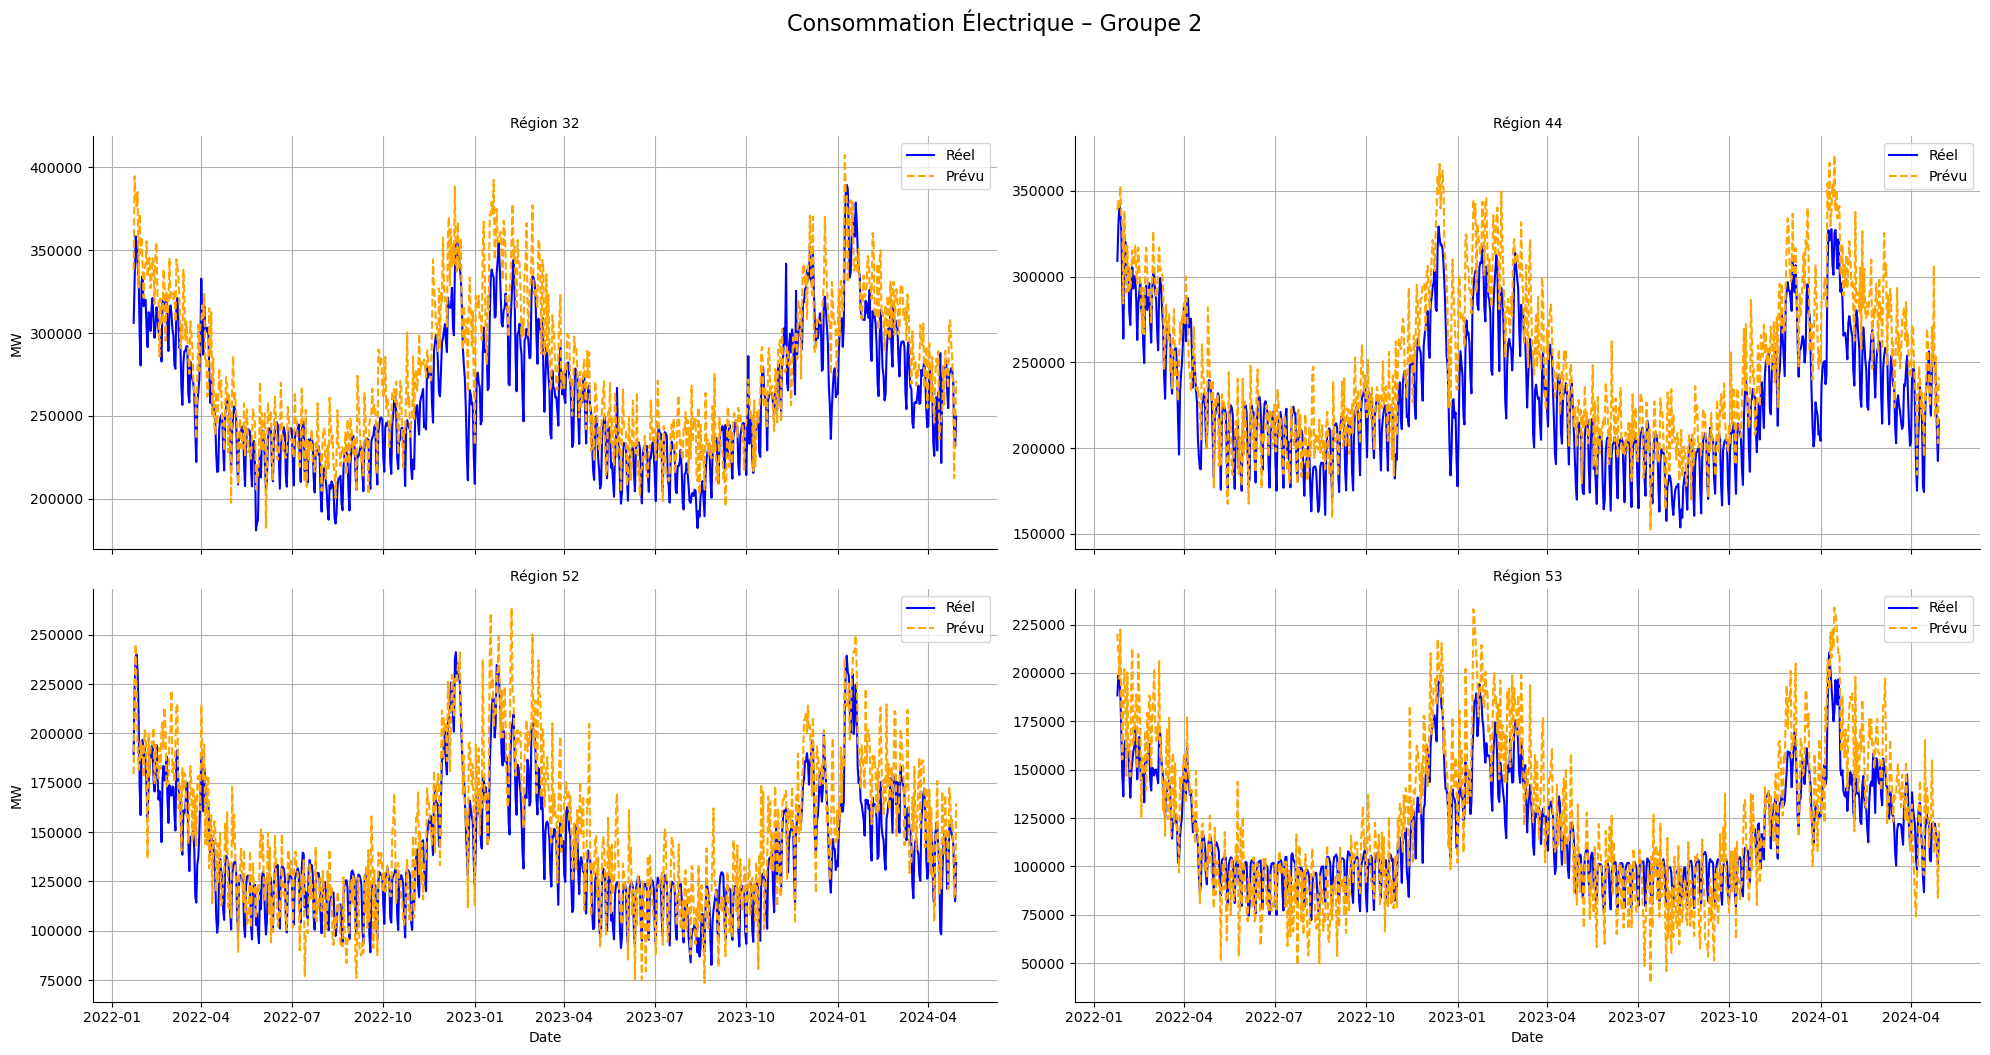

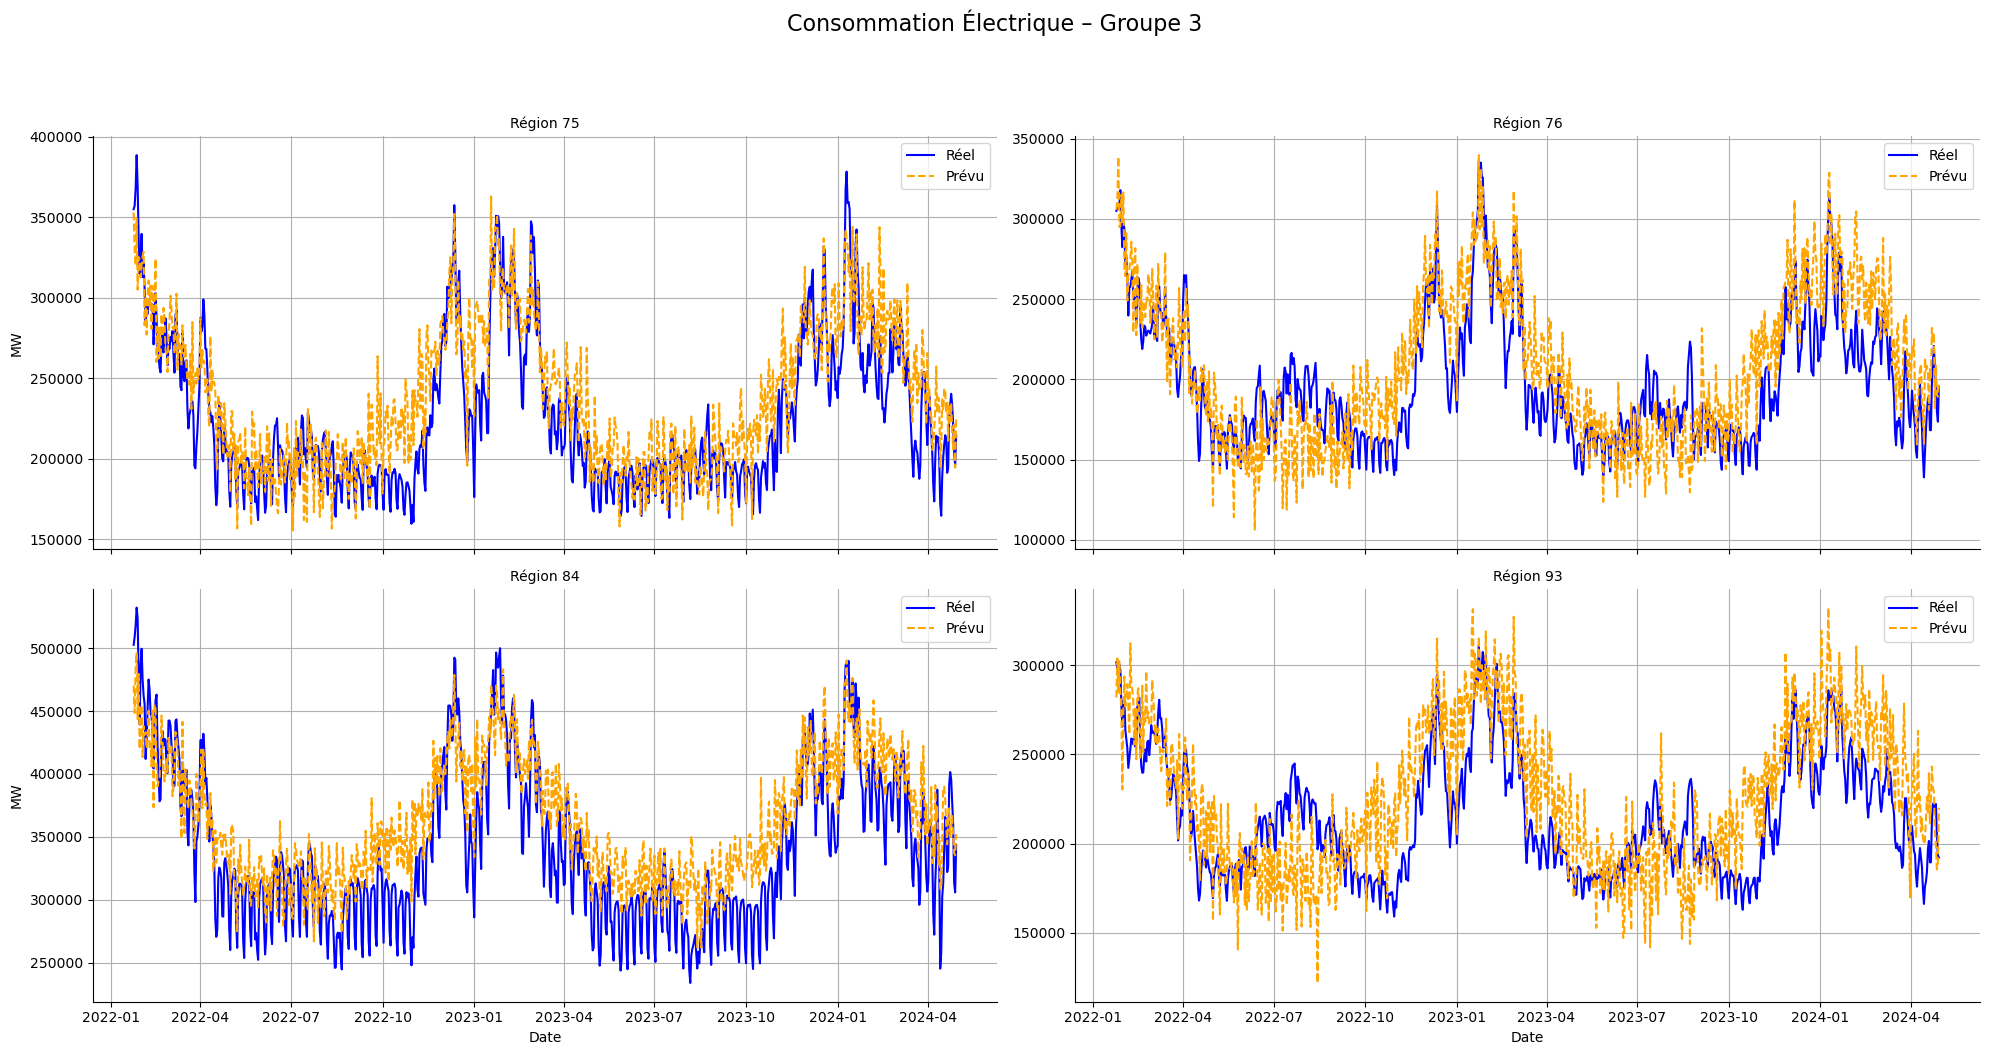

In [ ]:
regions = df_merged["insee_region"].unique()
regions.sort()


n = len(regions)
split_regions = [regions[i:i + 4] for i in range(0, n, 4)]

for i, group in enumerate(split_regions):
    g = sns.FacetGrid(
        df_merged[df_merged["insee_region"].isin(group)],
        col="insee_region",
        col_wrap=2,
        height=5,
        aspect=2,
        sharey=False
    )
    g.map_dataframe(sns.lineplot, x="date", y="conso_elec_mw_true", label="Réel", color="blue")
    g.map_dataframe(sns.lineplot, x="date", y="conso_elec_mw_pred", label="Prévu", color="orange", linestyle="--")
    g.set_titles("Région {col_name}")
    g.set_axis_labels("Date", "MW")
    for ax in g.axes.flat:
        ax.legend()
        ax.grid(True)
    plt.suptitle(f"Consommation Électrique – Groupe {i+1}", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\1199626348.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arnov\anaconda3\envs\ML_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


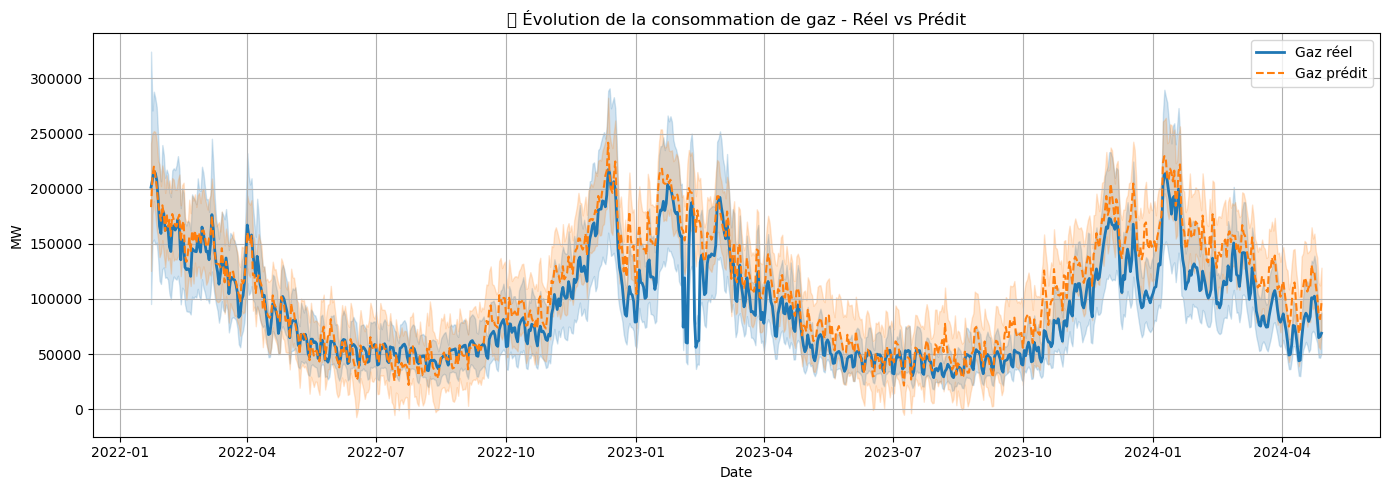

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_merged, x="date", y="conso_gaz_mw_true", label="Gaz réel", linewidth=2)
sns.lineplot(data=df_merged, x="date", y="conso_gaz_mw_pred", label="Gaz prédit", linestyle="--")
plt.title(" Évolution de la consommation de gaz - Réel vs Prédit")
plt.xlabel("Date")
plt.ylabel("MW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

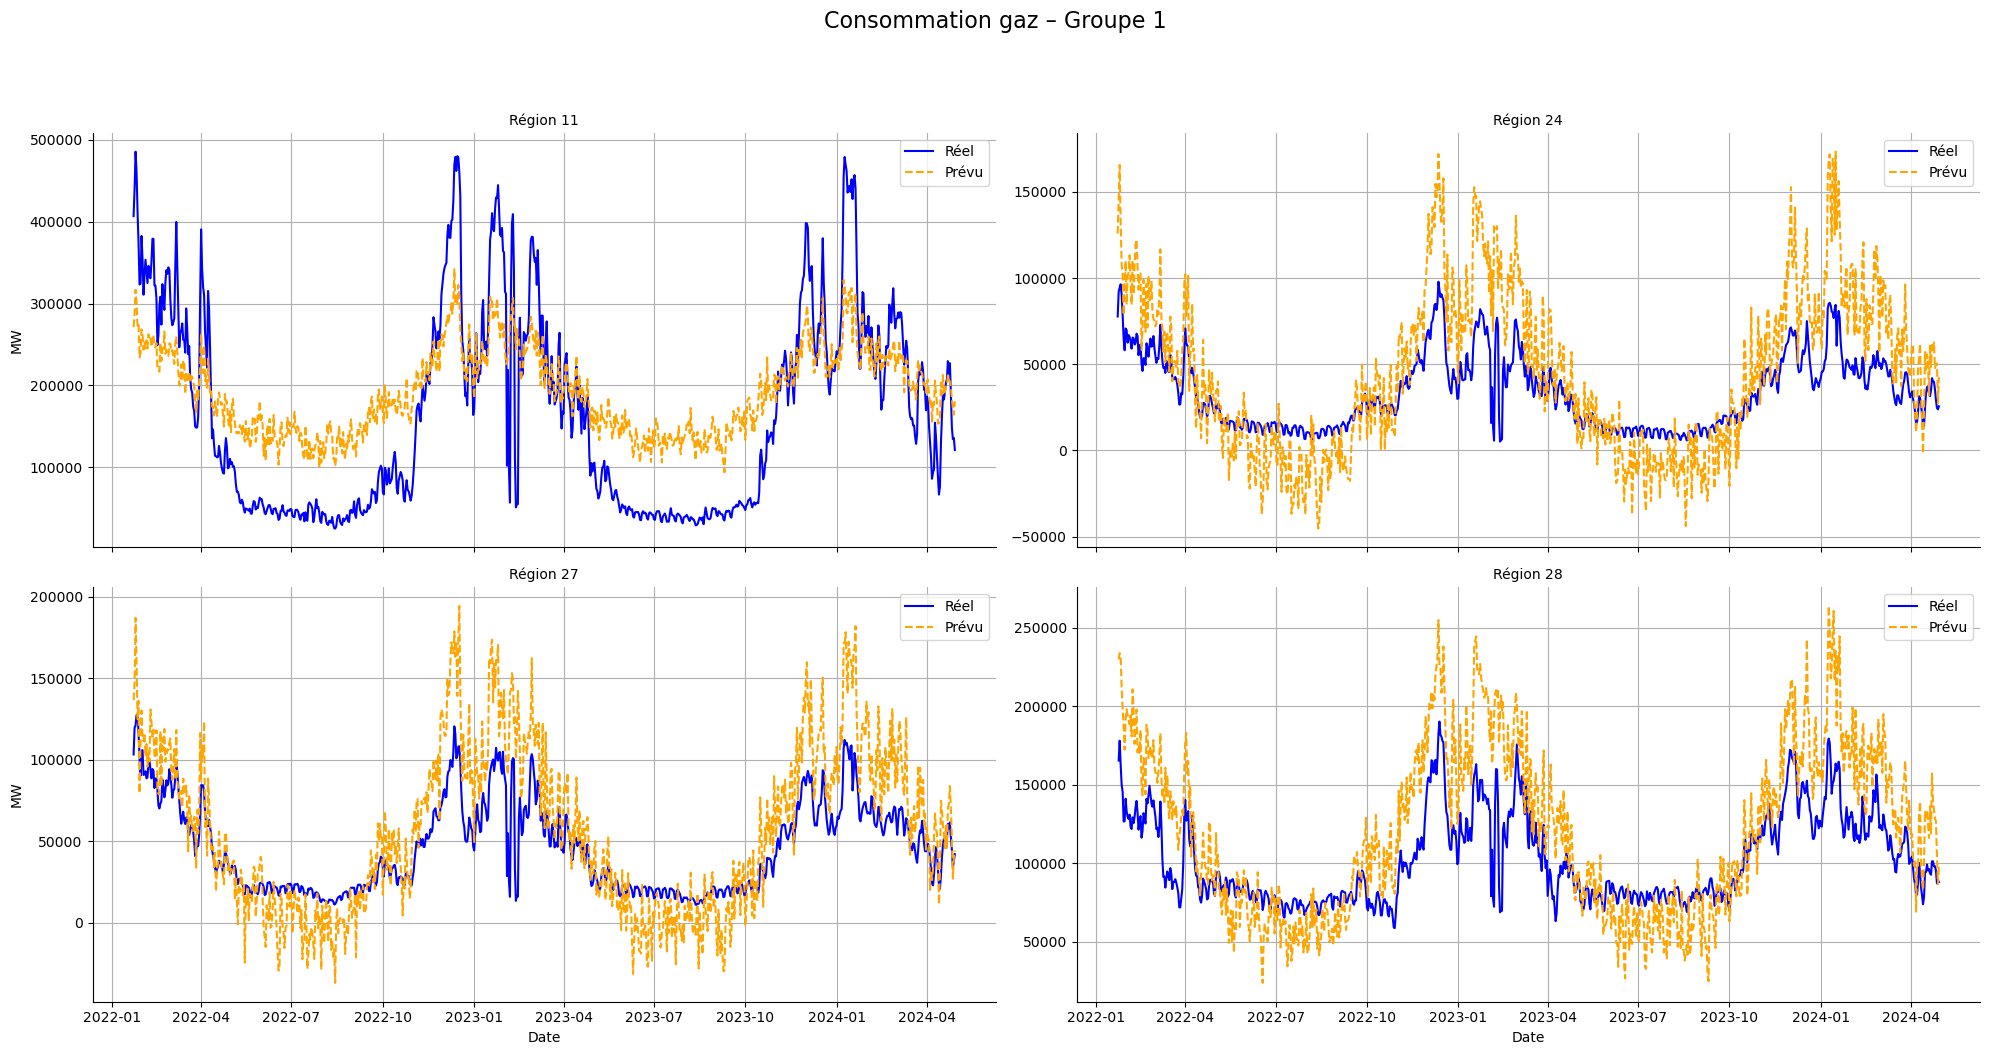

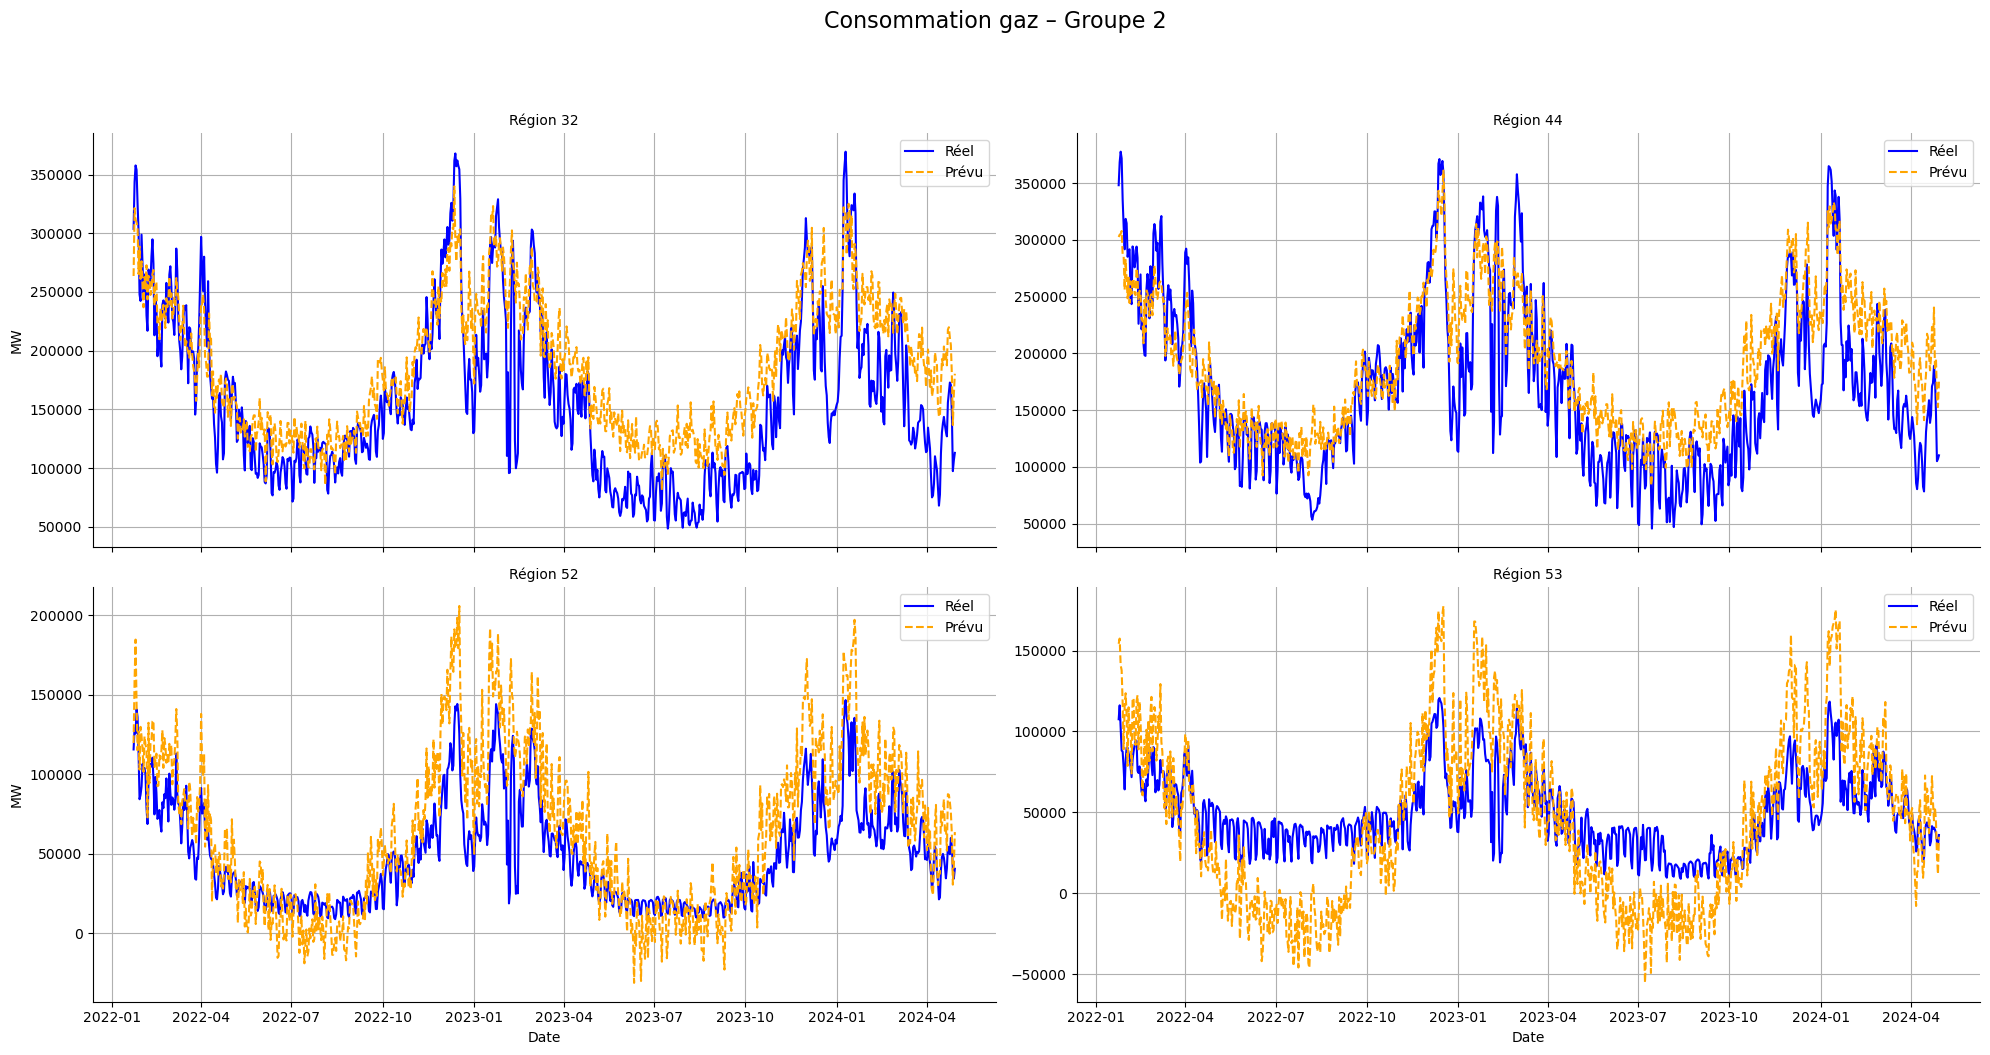

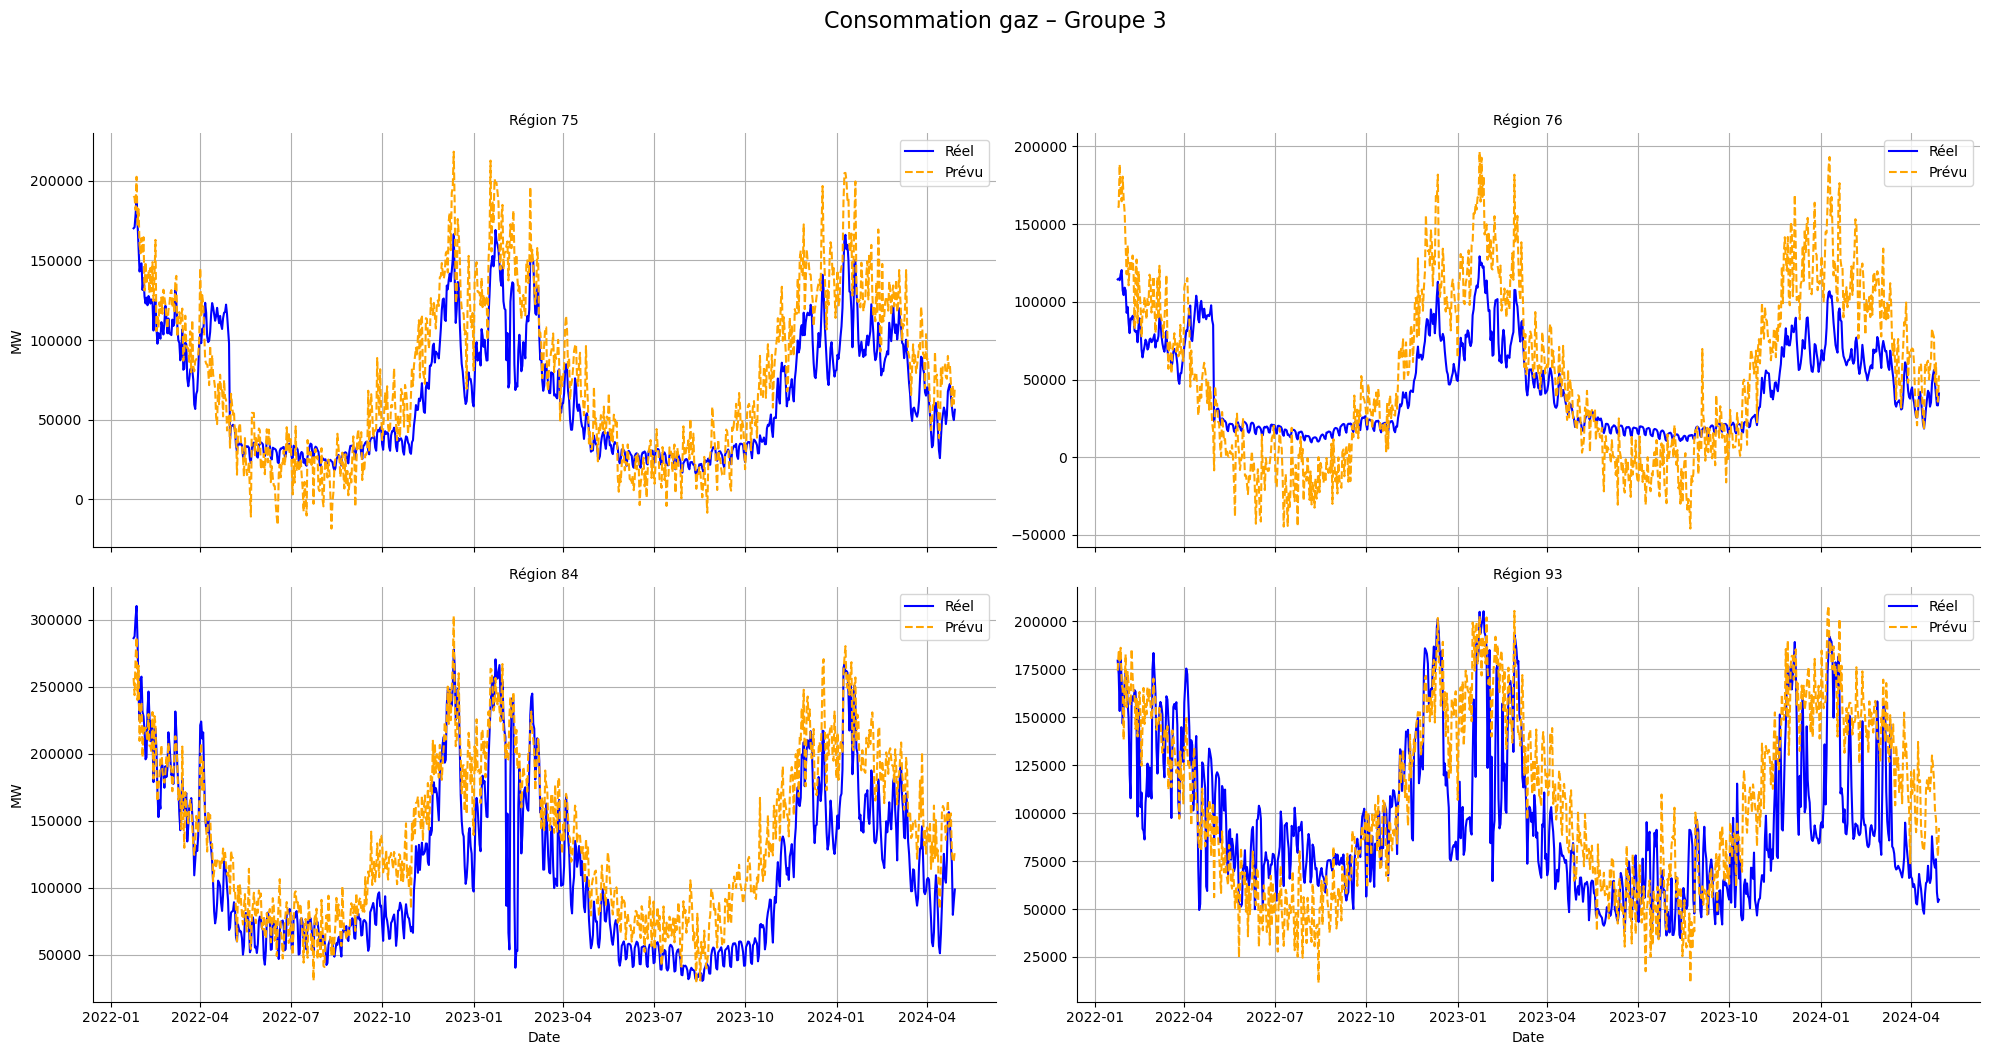

In [ ]:
regions = df_merged["insee_region"].unique()
regions.sort()


n = len(regions)
split_regions = [regions[i:i + 4] for i in range(0, n, 4)]

for i, group in enumerate(split_regions):
    g = sns.FacetGrid(
        df_merged[df_merged["insee_region"].isin(group)],
        col="insee_region",
        col_wrap=2,
        height=5,
        aspect=2,
        sharey=False
    )
    g.map_dataframe(sns.lineplot, x="date", y="conso_gaz_mw_true", label="Réel", color="blue")
    g.map_dataframe(sns.lineplot, x="date", y="conso_gaz_mw_pred", label="Prévu", color="orange", linestyle="--")
    g.set_titles("Région {col_name}")
    g.set_axis_labels("Date", "MW")
    for ax in g.axes.flat:
        ax.legend()
        ax.grid(True)
    plt.suptitle(f"Consommation gaz – Groupe {i+1}", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()


In [ ]:
df_merged["error_elec"] = df_merged["conso_elec_mw_pred"] - df_merged["conso_elec_mw_true"]
df_merged["error_gaz"] = df_merged["conso_gaz_mw_pred"] - df_merged["conso_gaz_mw_true"]

print(" Erreurs globales :")
print(f"   RMSE Élec : {np.sqrt(np.mean(df_merged['error_elec'] ** 2)):.2f}")
print(f"   RMSE Gaz  : {np.sqrt(np.mean(df_merged['error_gaz'] ** 2)):.2f}")

📌 Erreurs globales :
  ⚡ RMSE Élec : 30467.24
  🔥 RMSE Gaz  : 40589.03


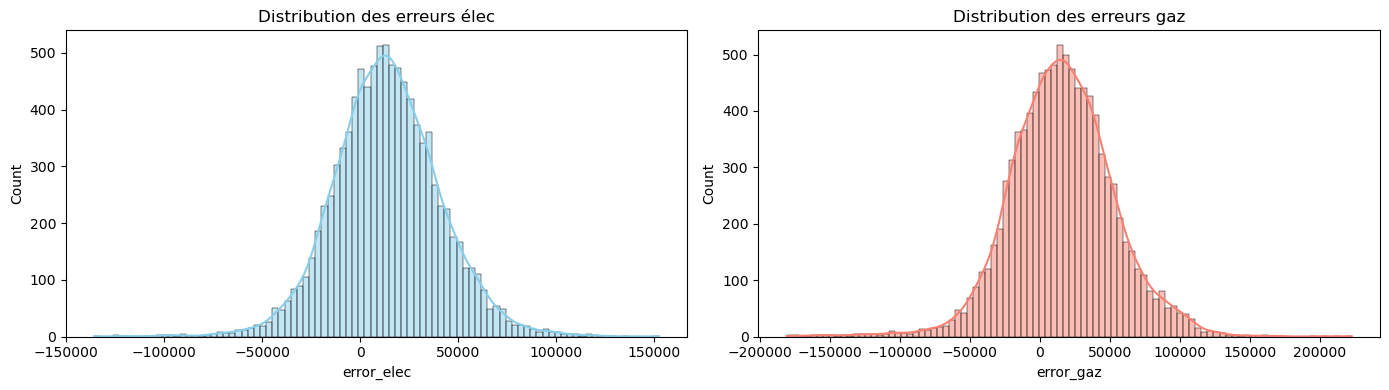

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_merged["error_elec"], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution des erreurs élec")

sns.histplot(df_merged["error_gaz"], kde=True, ax=axes[1], color="salmon")
axes[1].set_title("Distribution des erreurs gaz")

plt.tight_layout()
plt.show()

C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\484372783.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_rmse = df_merged.groupby("insee_region").apply(
C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\484372783.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rmse, x="insee_region", y="rmse_elec", palette="Blues_d")
C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\484372783.py:15: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arnov\anaconda3\envs\ML_env

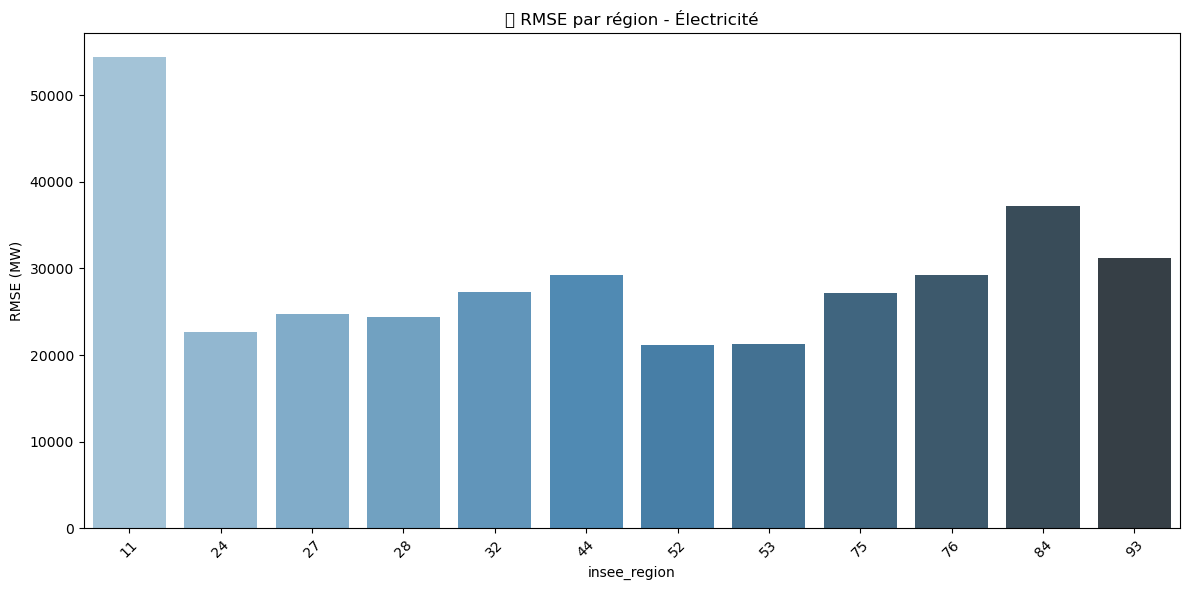

C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\484372783.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_rmse, x="insee_region", y="rmse_gaz", palette="Reds_d")
C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\484372783.py:23: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\arnov\anaconda3\envs\ML_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


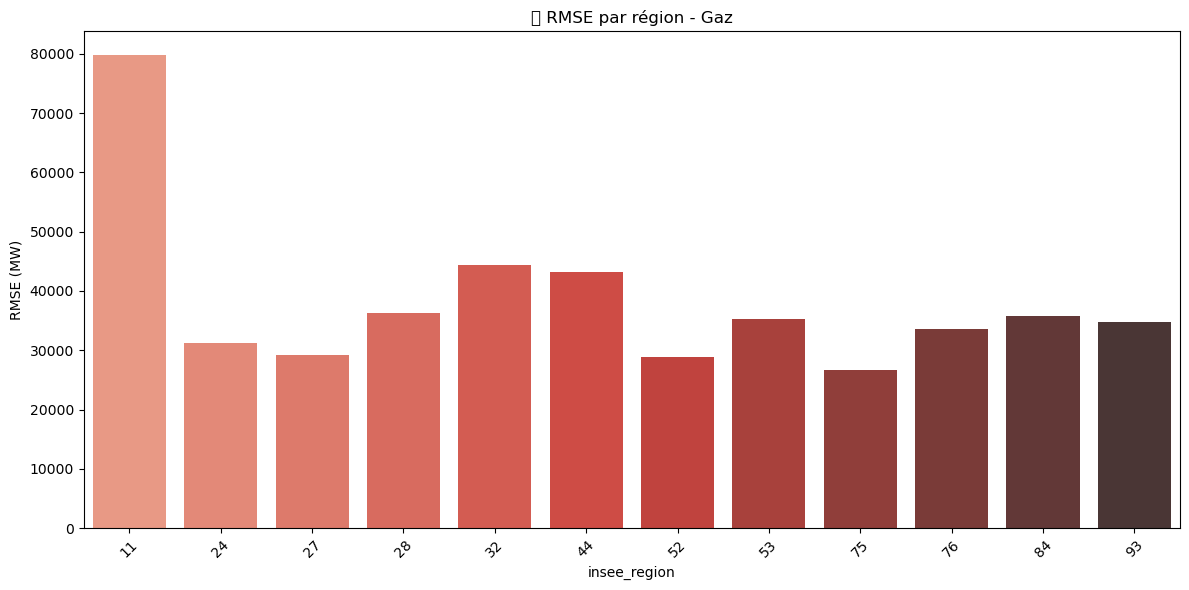

In [ ]:
region_rmse = df_merged.groupby("insee_region").apply(
    lambda g: pd.Series({
        "rmse_elec": np.sqrt(np.mean((g["conso_elec_mw_pred"] - g["conso_elec_mw_true"]) ** 2)),
        "rmse_gaz":  np.sqrt(np.mean((g["conso_gaz_mw_pred"] - g["conso_gaz_mw_true"]) ** 2)),
    })
).reset_index()

region_rmse.sort_values("rmse_elec", ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=region_rmse, x="insee_region", y="rmse_elec", palette="Blues_d")
plt.title(" RMSE par région - Électricité")
plt.xticks(rotation=45)
plt.ylabel("RMSE (MW)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=region_rmse, x="insee_region", y="rmse_gaz", palette="Reds_d")
plt.title(" RMSE par région - Gaz")
plt.xticks(rotation=45)
plt.ylabel("RMSE (MW)")
plt.tight_layout()
plt.show()

In [9]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Éviter la division par 0
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape_by_region_elec = (
    df_merged
    .groupby("insee_region")
    .apply(lambda g: mean_absolute_percentage_error(g["conso_elec_mw_true"], g["conso_elec_mw_pred"]))
    .reset_index()
    .rename(columns={0: "MAPE (%)"})

)
print(mape_by_region_elec.sort_values("MAPE (%)"))
# Calcul du MAPE par région
mape_by_region_gaz = (
    df_merged
    .groupby("insee_region")
    .apply(lambda g: mean_absolute_percentage_error(g["conso_gaz_mw_true"], g["conso_gaz_mw_pred"]))
    .reset_index()
    .rename(columns={0: "MAPE (%)"})

)
print(mape_by_region_gaz.sort_values("MAPE (%)"))

    insee_region   MAPE (%)
4             32   8.634213
10            84   9.766711
8             75  10.171821
5             44  10.459321
11            93  12.311253
6             52  12.460906
9             76  12.514727
3             28  13.396688
0             11  14.436306
7             53  14.533408
2             27  17.428956
1             24  18.447783
    insee_region    MAPE (%)
5             44   26.903492
3             28   28.387345
4             32   31.182063
11            93   34.522226
10            84   34.874806
8             75   37.915163
6             52   58.084405
2             27   62.661269
7             53   79.093433
9             76   82.160699
0             11   96.768351
1             24  104.023242


C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\855448275.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: mean_absolute_percentage_error(g["conso_elec_mw_true"], g["conso_elec_mw_pred"]))
C:\Users\arnov\AppData\Local\Temp\ipykernel_22428\855448275.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: mean_absolute_percentage_error(g["conso_gaz_mw_true"], g["conso_gaz_

In [ ]:
global_mape_elec = mean_absolute_percentage_error(df_merged["conso_elec_mw_true"], df_merged["conso_elec_mw_pred"])
print(f" MAPE global Electricity : {global_mape_elec:.2f}%")

🌍 MAPE global Electricity : 12.88%


In [ ]:
global_mape_gaz = mean_absolute_percentage_error(df_merged["conso_gaz_mw_true"], df_merged["conso_gaz_mw_pred"])
print(f" MAPE global gaz : {global_mape_gaz:.2f}%")

🌍 MAPE global gaz : 56.39%


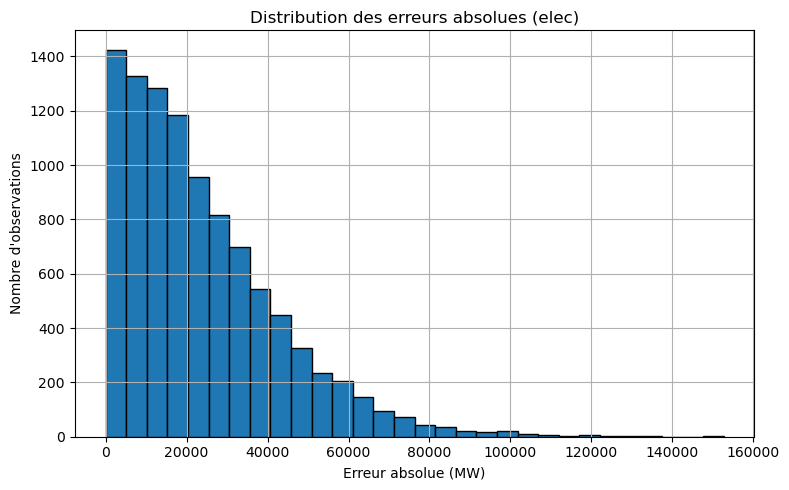

In [12]:


errors = np.abs(df_merged["conso_elec_mw_true"] - df_merged["conso_elec_mw_pred"])

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor="k")
plt.title("Distribution des erreurs absolues (elec)")
plt.xlabel("Erreur absolue (MW)")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
errors = np.abs(df_merged["conso_gaz_mw_true"] - df_merged["conso_gaz_mw_pred"])

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor="k")
plt.title("Distribution des erreurs absolues (gaz)")
plt.xlabel("Erreur absolue (MW)")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(df_merged["conso_elec_mw_true"], df_merged["conso_elec_mw_pred"], alpha=0.5)
plt.plot(
    [df_merged["conso_elec_mw_true"].min(), df_merged["conso_elec_mw_true"].max()],
    [df_merged["conso_elec_mw_true"].min(), df_merged["conso_elec_mw_true"].max()],
    color="red", linestyle="--", label="Idéal"
)
plt.title("Prédiction vs Vérité – Électricité")
plt.xlabel("Vérité (MW)")
plt.ylabel("Prédiction (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


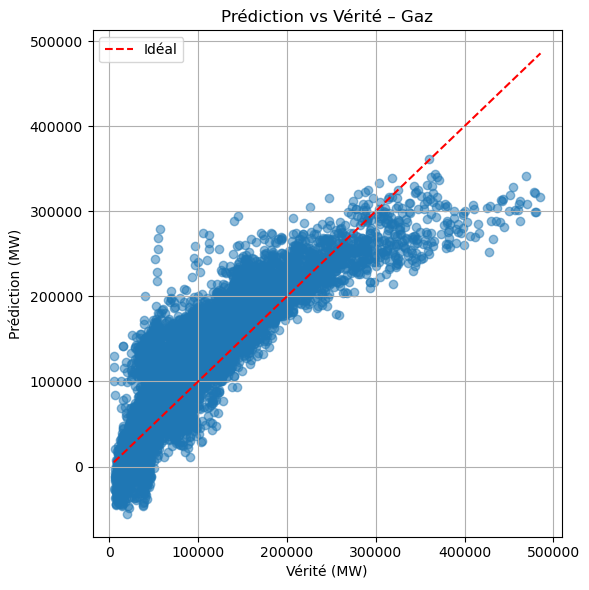

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(df_merged["conso_gaz_mw_true"], df_merged["conso_gaz_mw_pred"], alpha=0.5)
plt.plot(
    [df_merged["conso_gaz_mw_true"].min(), df_merged["conso_gaz_mw_true"].max()],
    [df_merged["conso_gaz_mw_true"].min(), df_merged["conso_gaz_mw_true"].max()],
    color="red", linestyle="--", label="Idéal"
)
plt.title("Prédiction vs Vérité – Gaz")
plt.xlabel("Vérité (MW)")
plt.ylabel("Prédiction (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()